# ШерстовАИ_КМБО-03-23_ПР_3

# 1.3.1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

0 0 0
3 3 3
1 2 3
3 2 1
1 - 2
5.196152422706632
27.0
3.0
9.0
1 - 3
3.7416573867739413
14.0
3.0
6.0
1 - 4
3.7416573867739413
14.0
3.0
6.0
2 - 3
2.23606797749979
5.000000000000001
2.0
3.0
2 - 4
2.23606797749979
5.000000000000001
2.0
3.0
3 - 4
2.8284271247461903
8.000000000000002
2.0
4.0


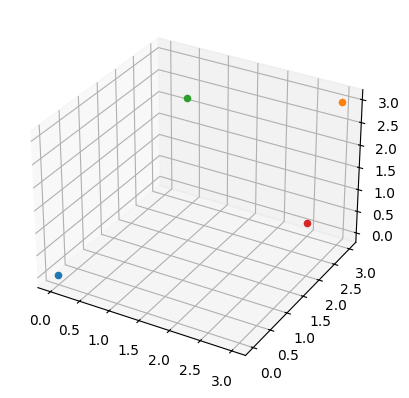

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p1 = np.array(list(map(float,(input().split()))))
p2 = np.array(list(map(float,(input().split()))))
p3 = np.array(list(map(float,(input().split()))))
p4 = np.array(list(map(float,(input().split()))))
arr = [p1, p2, p3, p4]
for x in range(4):
    for y in range(x+1, 4):
        print(x+1, "-", y+1)
        print(np.linalg.norm(arr[x]- arr[y]))
        print(np.linalg.norm(arr[x]- arr[y]) ** 2)
        print(np.linalg.norm(arr[x]- arr[y], ord=np.inf))
        print(np.linalg.norm(arr[x]- arr[y], ord=1))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(p1[0], p1[1], p1[2])
ax.scatter(p2[0], p2[1], p2[2])
ax.scatter(p3[0], p3[1], p3[2])
ax.scatter(p4[0], p4[1], p4[2])

plt.show()

# 1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания необходимо использовать функцию ```arange```.

In [8]:
import numpy as np
a = np.zeros((5,5))
a += np.arange(5)
print(a)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


# 2.3.1
Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1.   Установите другое количество ближайших соседей (k = 1, 5, 10).
2.   Установите размер тестовой выборки 15% от всего датасета.
3.   Постройте графики и оцените качество моделей, проанализируйте результаты.

k = 1 ; accuracy: 0.9565217391304348
k = 2 ; accuracy: 0.8695652173913043
k = 3 ; accuracy: 0.9565217391304348
k = 4 ; accuracy: 0.9565217391304348
k = 5 ; accuracy: 0.9565217391304348
k = 6 ; accuracy: 0.9565217391304348
k = 7 ; accuracy: 0.9565217391304348
k = 8 ; accuracy: 0.9130434782608695
k = 9 ; accuracy: 0.9130434782608695
k = 10 ; accuracy: 0.9130434782608695


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


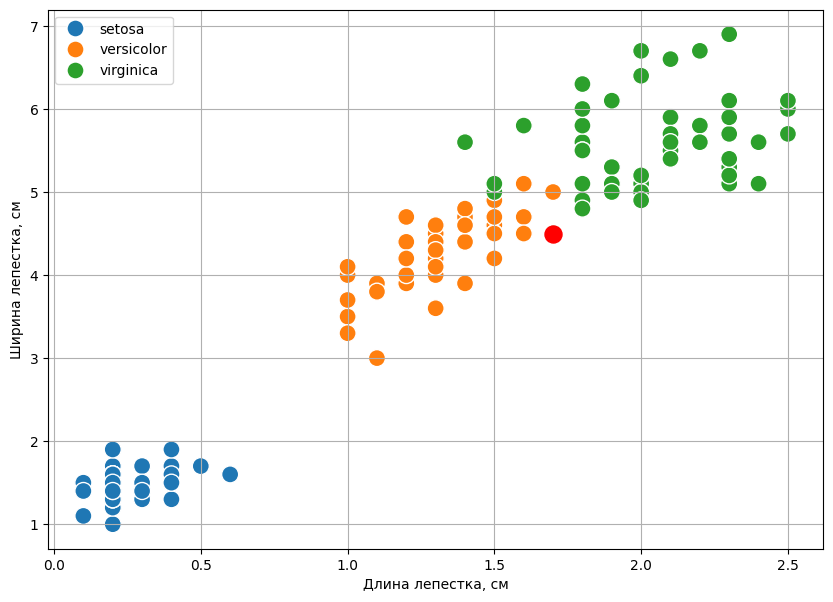

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('k =',k,'; accuracy:', accuracy_score(y_test, y_pred))


best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris, x='petal_width',
                y='petal_length', hue='species', s=150)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3],
                    X_test.iloc[i, 2], color='red', s=150)
iris

# 3.3.2
Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [19]:
from sklearn.feature_extraction import DictVectorizer
data_dict =[{'weight': 90, 'height': 191, 'age': 29},
{'weight': 70, 'height': 182, 'age': 35},
{'weight': 80, 'height': 197, 'age': 27}]
features = DictVectorizer(sparse=False).fit_transform(data_dict)
features

array([[ 29., 191.,  90.],
       [ 35., 182.,  70.],
       [ 27., 197.,  80.]])